In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
## read the dataset
df=pd.read_csv("height-weight.csv")
df=pd.DataFrame(df)

In [41]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Hight')

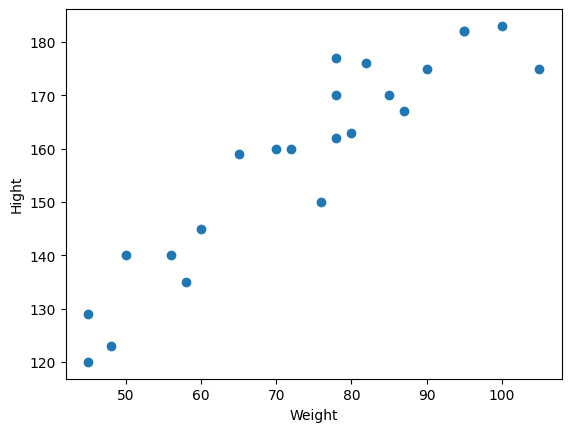

In [42]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Hight")

In [43]:

##divide our dataset into independent and dependent features
X = df['Weight']
y = df['Height']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [45]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [46]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [47]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test=scaler.transform(X_test.values.reshape(-1, 1))

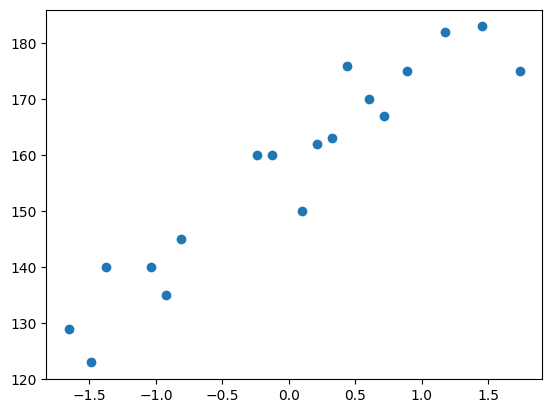

In [48]:
plt.scatter(X_train,y_train)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
regressor = LinearRegression()

In [51]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
type(X_train)

numpy.ndarray

In [53]:

X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [54]:
type(X_train)

numpy.ndarray

In [55]:

y_train.shape

(18,)

In [56]:
regressor.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
## corfficient and intercept
print("Cofficient :",regressor.coef_)
print("Intercept :",regressor.intercept_)

Cofficient : [17.03440872]
Intercept : 157.5


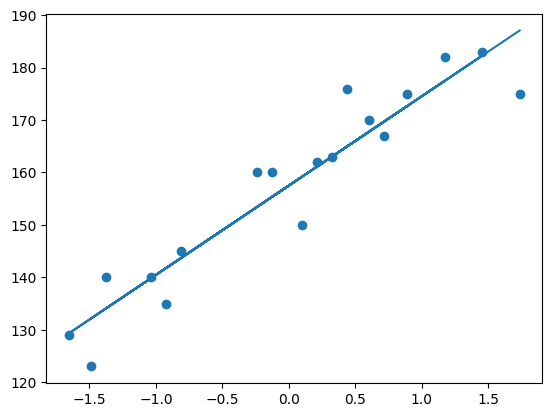

In [58]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

## prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =65.4364 + 1.26(X_train)

## prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =65.4364 + 1.26(X_test)

In [59]:
y_pred_test=regressor.predict(X_test)

In [60]:
print(y_test,y_pred_test)

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64 [161.08467086 161.08467086 129.3041561  177.45645118 148.56507414]


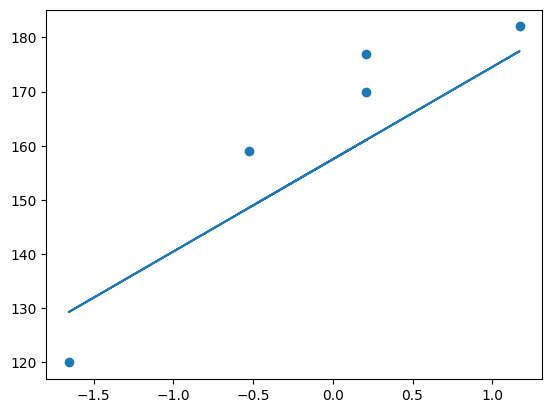

In [61]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))

In [62]:
## Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [63]:

mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


109.77592599051664
9.822657814519232
10.477400726827081


In [64]:

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [65]:
print(score)

0.776986986042344


## R Square
Formula

R^2=1-SSR/SST
R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [66]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
print(score)

0.776986986042344


#### Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:
R2: The R2 of the model n: The number of observations k: The number of predictor variables



In [67]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [68]:
regressor.predict(scaler.transform([[75]]))

array([158.19553315])

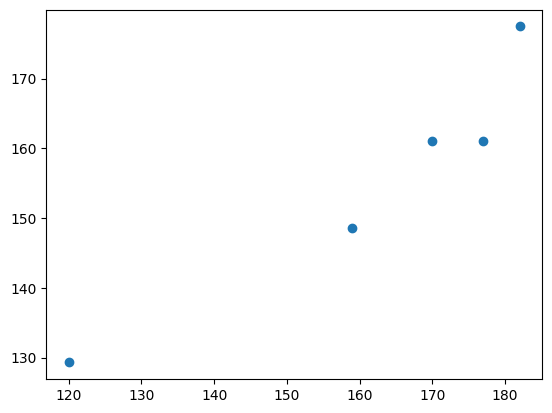

In [69]:
## Assumptions

## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [70]:
## Residuals
residuals=y_test-y_pred_test

residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

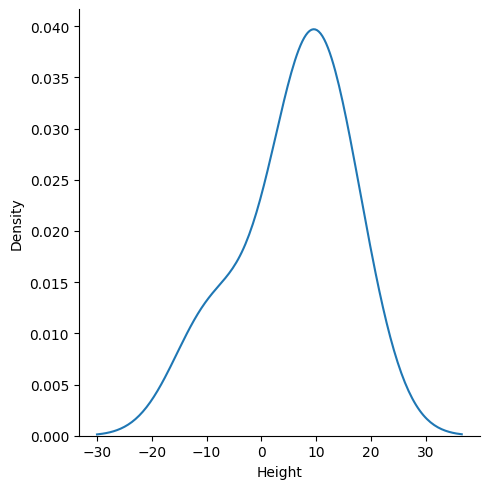

In [71]:
## Plot this residuals
import seaborn as sns
sns.displot(residuals,kind='kde')

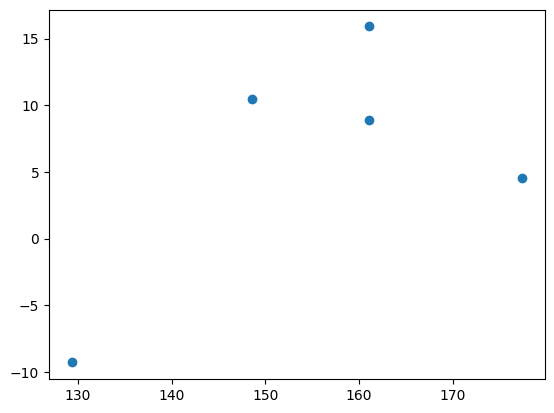

In [72]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)

### Using OLS

In [73]:
import statsmodels.api as sm

In [74]:
model = sm.OLS(y_train, X_train).fit()
predications = model.predict(X_test)

In [75]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Wed, 29 Oct 2025   Prob (F-statistic):                       0.661
Time:                        01:19:45   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [76]:
regressor.coef_

array([17.03440872])